#### Dataset Link : https://archive.ics.uci.edu/ml/datasets/iris


- DD Data Link : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
- DD Data Description Link : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

In [2]:
import pandas as PD

In [9]:

DF = PD.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


In [3]:
# adding column name to the respective columns
DF.columns =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
DF.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [17]:
DF.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [14]:
DF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
print("Sepal Length : ")
print('Mean : ', DF['sepal_length'].mean())
print('Median : ', DF['sepal_length'].median())
print('Mode : ', DF['sepal_length'].mode())
print('Standard Deviation : ', DF['sepal_length'].std())

Sepal Length : 
Mean :  5.8483221476510066
Median :  5.8
Mode :  0    5.0
dtype: float64
Standard Deviation :  0.8285940572656173


#### Outlier Detection and Removal

<AxesSubplot:>

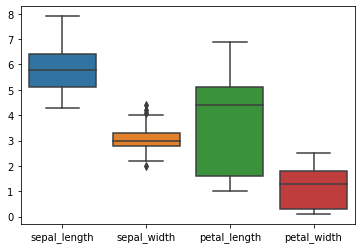

In [5]:
import seaborn as sns
sns.boxplot(data=DF)

<AxesSubplot:xlabel='sepal_width'>

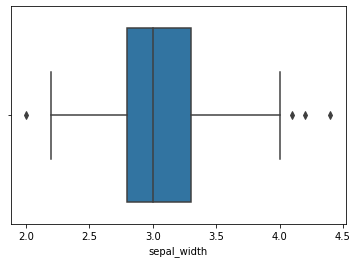

In [6]:
#Found Outlier in Sepal Width
sns.boxplot(x=DF['sepal_width'])fig, ax =fig, ax = MPLOT.subplots(figsize=(30, 20))
SNS.boxplot(data=DF, ax=ax) MPLOT.subplots(figsize=(30, 20))
SNS.boxplot(data=DF, ax=ax)


In [9]:
print("Highest allowed",DF['sepal_width'].mean() + 3*DF['sepal_width'].std())
print("Lowest allowed",DF['sepal_width'].mean() - 3*DF['sepal_width'].std())

Highest allowed 4.351503344559639
Lowest allowed 1.7505100782591532


,sepal_length,sepal_width,petal_length,petal_width,class


In [31]:
DF[(DF['sepal_width'] == 2.0 )]

,sepal_length,sepal_width,petal_length,petal_width,class
59,5.0,2.0,3.5,1.0,Iris-versicolor


In [35]:
DF[(DF['sepal_width'] > 4.0 )]

,sepal_length,sepal_width,petal_length,petal_width,class
14,5.7,4.4,1.5,0.4,Iris-setosa
31,5.2,4.1,1.5,0.1,Iris-setosa
32,5.5,4.2,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal_width'>

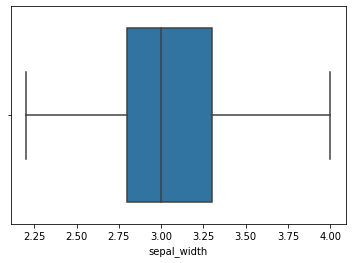

In [37]:
NoOutliers_DF = DF.drop([59,14,31,32])
sns.boxplot(x=NoOutliers_DF['sepal_width'])

### GroupBy

In [44]:
DF['sepal_length'].groupby(DF['class']).median()

class
Iris-setosa        5.0
Iris-versicolor    5.9
Iris-virginica     6.5
Name: sepal_length, dtype: float64

In [45]:
DF.groupby(DF['class']).describe()

sepal_length                                                 \
                       count      mean       std  min    25%  50%  75%  max   
class                                                                         
Iris-setosa             49.0  5.004082  0.355879  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936000  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588000  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width            ... petal_length      petal_width  \
                      count      mean  ...          75%  max       count   
class                                  ...                                 
Iris-setosa            49.0  3.416327  ...        1.600  1.9        49.0   
Iris-versicolor        50.0  2.770000  ...        4.600  5.1        50.0   
Iris-virginica         50.0  2.974000  ...        5.875  6.9        50.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
class                                                         
Iris-setosa      0.244898  0.108130  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326000  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026000  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [46]:
DF.groupby(DF['class']).describe().transpose()

class               Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    49.000000        50.000000       50.000000
             mean      5.004082         5.936000        6.588000
             std       0.355879         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    49.000000        50.000000       50.000000
             mean      3.416327         2.770000        2.974000
             std       0.384787         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.100000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.700000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    49.000000        50.000000       50.000000
             mean      1.465306         4.260000        5.552000
             std       0.175061         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.600000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    49.000000        50.000000       50.000000
             mean      0.244898         1.326000        2.026000
             std       0.108130         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000